In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
from skimage.feature import peak_local_max
from skimage.filters import difference_of_gaussians
from scipy.ndimage import maximum_filter
import skimage
import tifffile
import matplotlib.pyplot as plt

In [3]:
vol = tifffile.imread(r"D:\Tracking\NucleiTracking\data\interim\lightsheet\2025_02_06\recon\recon_fused_tp_368_ch_0.tif")

In [12]:
# volume = skimage.transform.downscale_local_mean(vol, (2, 2, 2))
siglo = 2
sighi = 5

v = difference_of_gaussians(vol, siglo, sighi)
pts = peak_local_max(v, min_distance=5, threshold_abs=120)
pts2 = peak_local_max(vol, min_distance=5, threshold_abs=650)
vals = v[pts[:, 0], pts[:, 1], pts[:, 2]]

In [14]:
import napari
viewer = napari.Viewer()

viewer.add_image(vol, name="Volume")
viewer.add_image(v, name="DoG")
viewer.add_points(pts, name="Peaks", size=8, face_color="blue")
viewer.add_points(pts2, name="Peaks2", size=8, face_color="red")

napari.run()

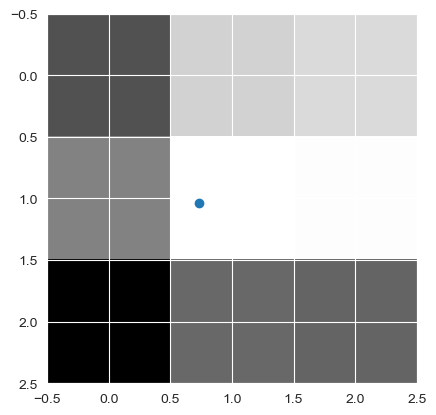

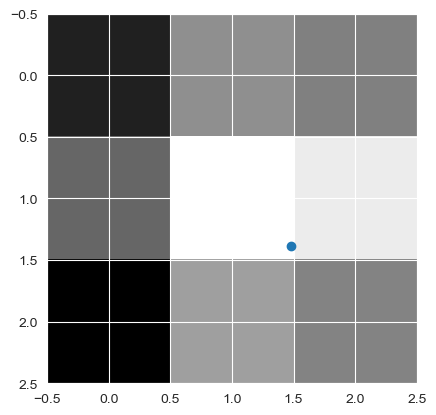

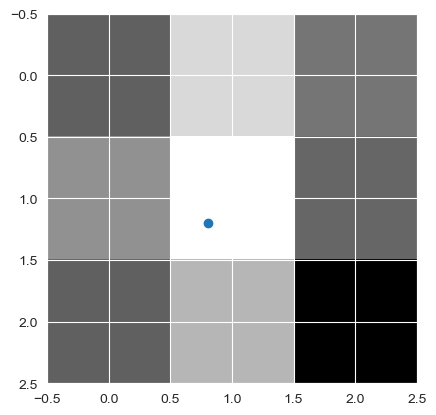

[[-2.71474302e-01  4.77386773e-01 -1.90931499e-01]
 [ 3.84199843e-02  3.86560023e-01  1.97760552e-01]
 [-1.58681169e-01 -8.09928700e-02  1.85709044e-01]
 [-4.44396734e-02 -1.32544786e-01  2.94096380e-01]
 [-4.59891140e-01  2.13102549e-01 -1.03818871e-01]
 [-1.93426460e-01  3.60628575e-01  4.21426445e-01]
 [-2.29104728e-01 -1.76966548e-01  2.51027882e-01]
 [-2.11617388e-02  1.05958775e-01  2.25135759e-01]
 [-3.31328847e-02 -9.91657376e-02  3.40328097e-01]
 [-3.06947559e-01  4.16095942e-01  1.29969195e-02]
 [-7.62073696e-02  3.21858793e-01 -3.76423299e-01]
 [ 3.18164557e-01  1.62580520e-01  3.54295895e-02]
 [-4.84870344e-01 -1.40091628e-01  1.68225452e-01]
 [-4.90592539e-01  4.36025172e-01  2.14128971e-01]
 [ 2.20689818e-01  1.56310350e-01 -2.54949570e-01]
 [ 1.27082199e-01 -3.65697682e-01 -4.44648117e-01]
 [-2.13284701e-01 -1.15784824e-01  3.36089820e-01]
 [ 2.54256696e-01  2.23265365e-01  3.29625070e-01]
 [-3.13463062e-01 -1.59700125e-01 -2.81151712e-01]
 [ 3.23206365e-01 -1.45616099e-

In [10]:
# def extract_boxes(volume, indices):
#     offsets = np.array([[i, j, k] for i in range(-1, 2) for j in range(-1, 2) for k in range(-1, 2)])
#     indices = indices[:, np.newaxis, :] + offsets
#     boxes = volume[indices[..., 0], indices[..., 1], indices[..., 2]]
#     return boxes.reshape(-1, 3, 3, 3)
# 
# subvols = extract_boxes(volume, pts)
# 
# xmean = np.mean(subvols, axis=(2, 3))
# ymean = np.mean(subvols, axis=(1, 3))
# zmean = np.mean(subvols, axis=(1, 2))
# 
# subpx = []
# 
# for va in [xmean, ymean, zmean]:
#     subpx.append((va[:, 2] - va[:, 0]) / (2 * (va[:, 0] + va[:, 2] - 2 * va[:, 1])))
# 
# plt.hist(subpx[0], bins=100)

sublocs = []
for axis in [0, 1, 2]:
    xoff = np.arange(-1, 2)
    maskarr = np.array([0, 0, 0])
    maskarr[axis] = 1
    xrow = pts[:, np.newaxis, :] + xoff[np.newaxis, :, np.newaxis] * np.broadcast_arrays(maskarr, pts)[0][:, np.newaxis, :]
    xrow = np.moveaxis(xrow, -1, 0)
    rowvals = v[*xrow]
    subpx = (rowvals[:, 0] - rowvals[:, 2]) / (2 * (rowvals[:, 0] + rowvals[:, 2] - 2 * rowvals[:, 1]))
    sublocs.append(subpx)
    
for pt, subpt in zip(pts[:5], sublocs):
    plt.imshow(v[pt[0]-1: pt[0]+2, pt[1]-1:pt[1]+2, pt[2]], cmap="gray")
    plt.scatter(subpt[0] + 1, subpt[1] + 1)
    plt.show()
    
print(np.stack(sublocs, -1))